In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [20]:
# Loading the dataset
data = pd.read_csv('game_details_with_counts.csv')

# Creating a binary label for high ratings
data['high_rating'] = (data['average_rating'] >= 7.5).astype(int)

# Selecting numeric features and target variable
features = ['weight', 'min_age', 'max_players', 'min_playtime', 'category_count', 'mechanic_count']
X = data[features]
y = data['high_rating']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



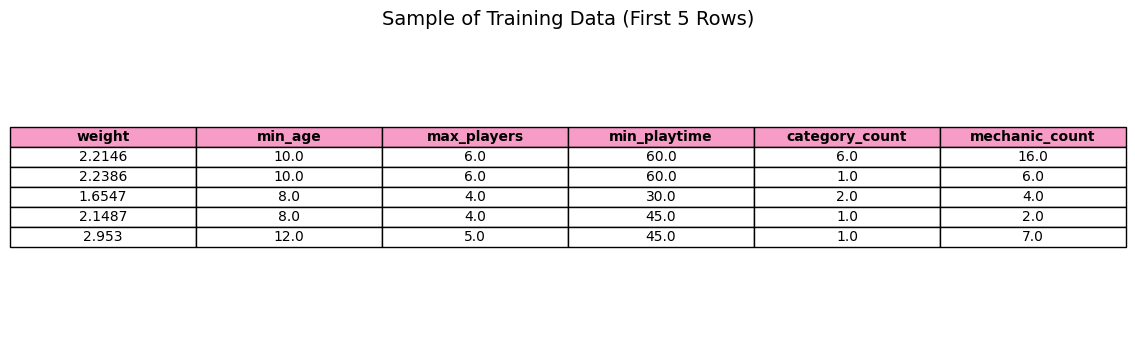

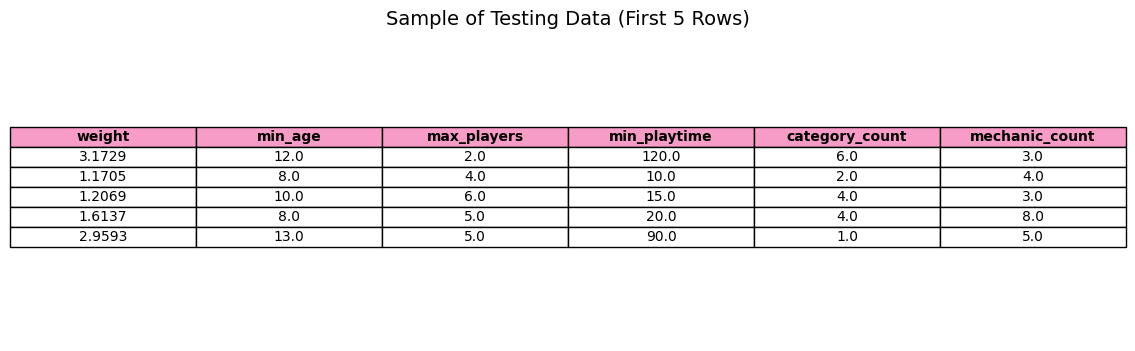

In [21]:
import matplotlib.pyplot as plt

# Extracting samples from training and testing sets
X_train_sample = X_train.head(5)
X_test_sample = X_test.head(5)

# Creating a function to plot data as a table
def plot_data_table(data, title, filename):
    plt.figure(figsize=(12, 4))  
    plt.axis('tight')
    plt.axis('off')

    # Creating the table for the data
    table = plt.table(cellText=data.values, 
                      colLabels=data.columns, 
                      cellLoc='center', 
                      loc='center')

    # Customizing the header row color
    for (i, j), cell in table.get_celld().items():
        if i == 0:  # Header row
            cell.set_fontsize(12)
            cell.set_text_props(weight='bold')
            cell.set_facecolor('#f79cc7')  
        else:
            cell.set_fontsize(10)

    # Adjusting font size and scaling for the table
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)

    # Adding a title
    plt.title(title, fontsize=14)
    
    # Saving the plot as an image
    plt.savefig(filename, dpi=300)
    plt.show()

# Plotting and save training data sample
plot_data_table(X_train_sample, "Sample of Training Data (First 5 Rows)", "training_data_sample_x.png")

# Plotting and save testing data sample
plot_data_table(X_test_sample, "Sample of Testing Data (First 5 Rows)", "testing_data_sample_x.png")


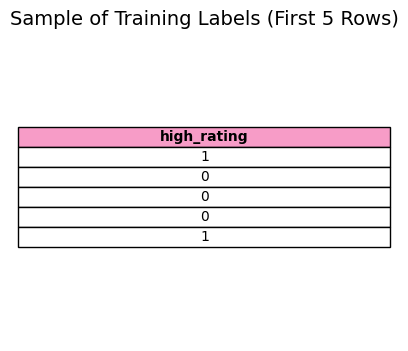

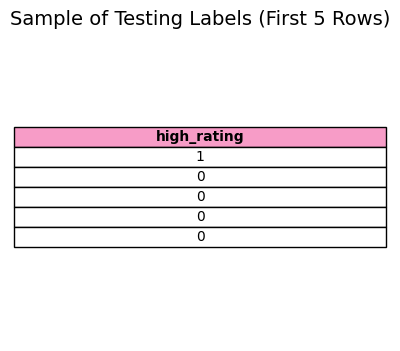

In [22]:
# Extracting samples from training and testing sets for labels (y)
y_train_sample = y_train.head(5)
y_test_sample = y_test.head(5)

# Creating a function to plot data as a table
def plot_data_table(data, title, filename):
    plt.figure(figsize=(4, 4))  
    plt.axis('tight')
    plt.axis('off')

    # Creating the table for the data
    table = plt.table(cellText=data.values.reshape(-1, 1),  
                      colLabels=[data.name],
                      cellLoc='center', 
                      loc='center')

    # Customizing the header row color
    for (i, j), cell in table.get_celld().items():
        if i == 0:  # Header row
            cell.set_fontsize(12)
            cell.set_text_props(weight='bold')
            cell.set_facecolor('#f79cc7') 
        else:
            cell.set_fontsize(10)

    # Adjusting font size and scaling for the table
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)

    # Adding a title
    plt.title(title, fontsize=14)
    
    # Saving the plot as an image
    plt.savefig(filename, dpi=300)
    plt.show()

# Plottng and save training labels sample
plot_data_table(y_train_sample, "Sample of Training Labels (First 5 Rows)", "training_labels_sample_y.png")

# Plotting and save testing labels sample
plot_data_table(y_test_sample, "Sample of Testing Labels (First 5 Rows)", "testing_labels_sample_y.png")


In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Standardizing the data using StandardScaler (SVMs are sensitive to feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing SVM classifiers with different kernels
kernels = ['linear', 'poly', 'rbf']
svm_models = {}

Kernel: linear
Accuracy: 0.7867
Confusion Matrix:
[[382  33]
 [ 95  90]]
--------------------------------------------------


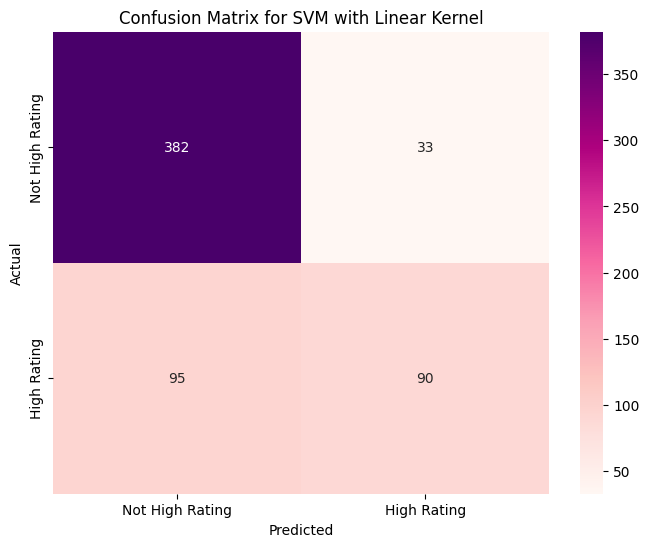

Kernel: poly
Accuracy: 0.7633
Confusion Matrix:
[[397  18]
 [124  61]]
--------------------------------------------------


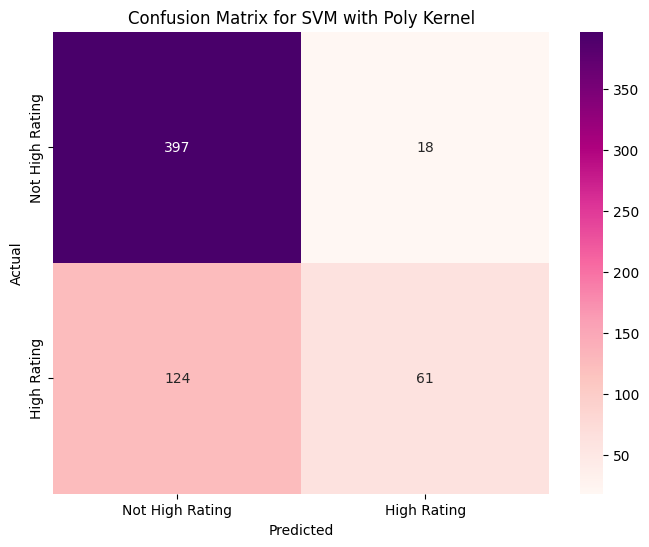

Kernel: rbf
Accuracy: 0.7833
Confusion Matrix:
[[384  31]
 [ 99  86]]
--------------------------------------------------


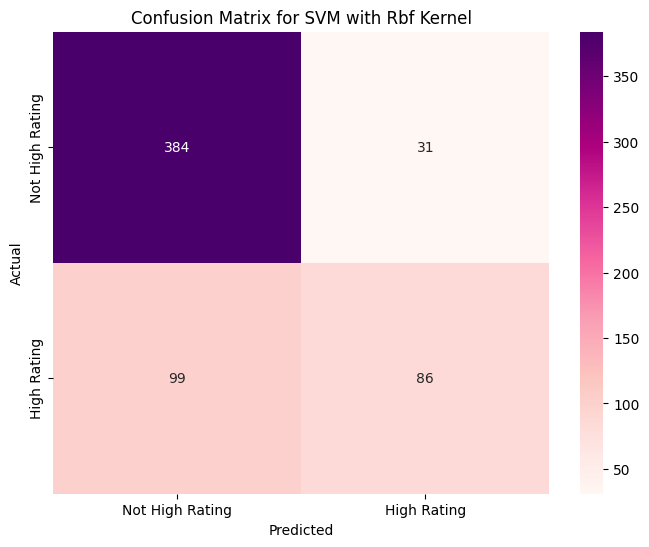

Accuracy comparison between kernels: {'linear': 0.7866666666666666, 'poly': 0.7633333333333333, 'rbf': 0.7833333333333333}


In [24]:

# Training the models and evaluate their performance
for kernel in kernels:
    # Initializing SVM model with the current kernel
    svm = SVC(kernel=kernel, random_state=42)
    
    # Training the model on the scaled training data
    svm.fit(X_train_scaled, y_train)
    
    # Making predictions on the testing data
    y_pred = svm.predict(X_test_scaled)
    
    # Calculating accuracy and confusion matrix
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Storing results
    svm_models[kernel] = {
        'model': svm,
        'accuracy': accuracy,
        'conf_matrix': conf_matrix
    }

    # Displaying the results for the current kernel
    print(f"Kernel: {kernel}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("-" * 50)

    # Plotting confusion matrix heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='RdPu', xticklabels=['Not High Rating', 'High Rating'], yticklabels=['Not High Rating', 'High Rating'])
    plt.title(f"Confusion Matrix for SVM with {kernel.capitalize()} Kernel")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig(f"confusion_matrix_{kernel}.png", dpi=300)
    plt.show()

# Comparing accuracy scores for each kernel
kernel_accuracies = {kernel: svm_models[kernel]['accuracy'] for kernel in kernels}
print("Accuracy comparison between kernels:", kernel_accuracies)